In [8]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

huella_path = "huella.jpg"
huella_escala_grises = cv2.imread(huella_path, cv2.IMREAD_GRAYSCALE)

alto, ancho = huella_escala_grises.shape
huellas_partes = [
   huella_escala_grises[0:int(alto/2), 0:int(ancho/2)],
   huella_escala_grises[0:int(alto/2), int(ancho/2):ancho],
   huella_escala_grises[int(alto/2):alto, 0:int(ancho/2)],
   huella_escala_grises[int(alto/2):alto, int(ancho/2):ancho]
]


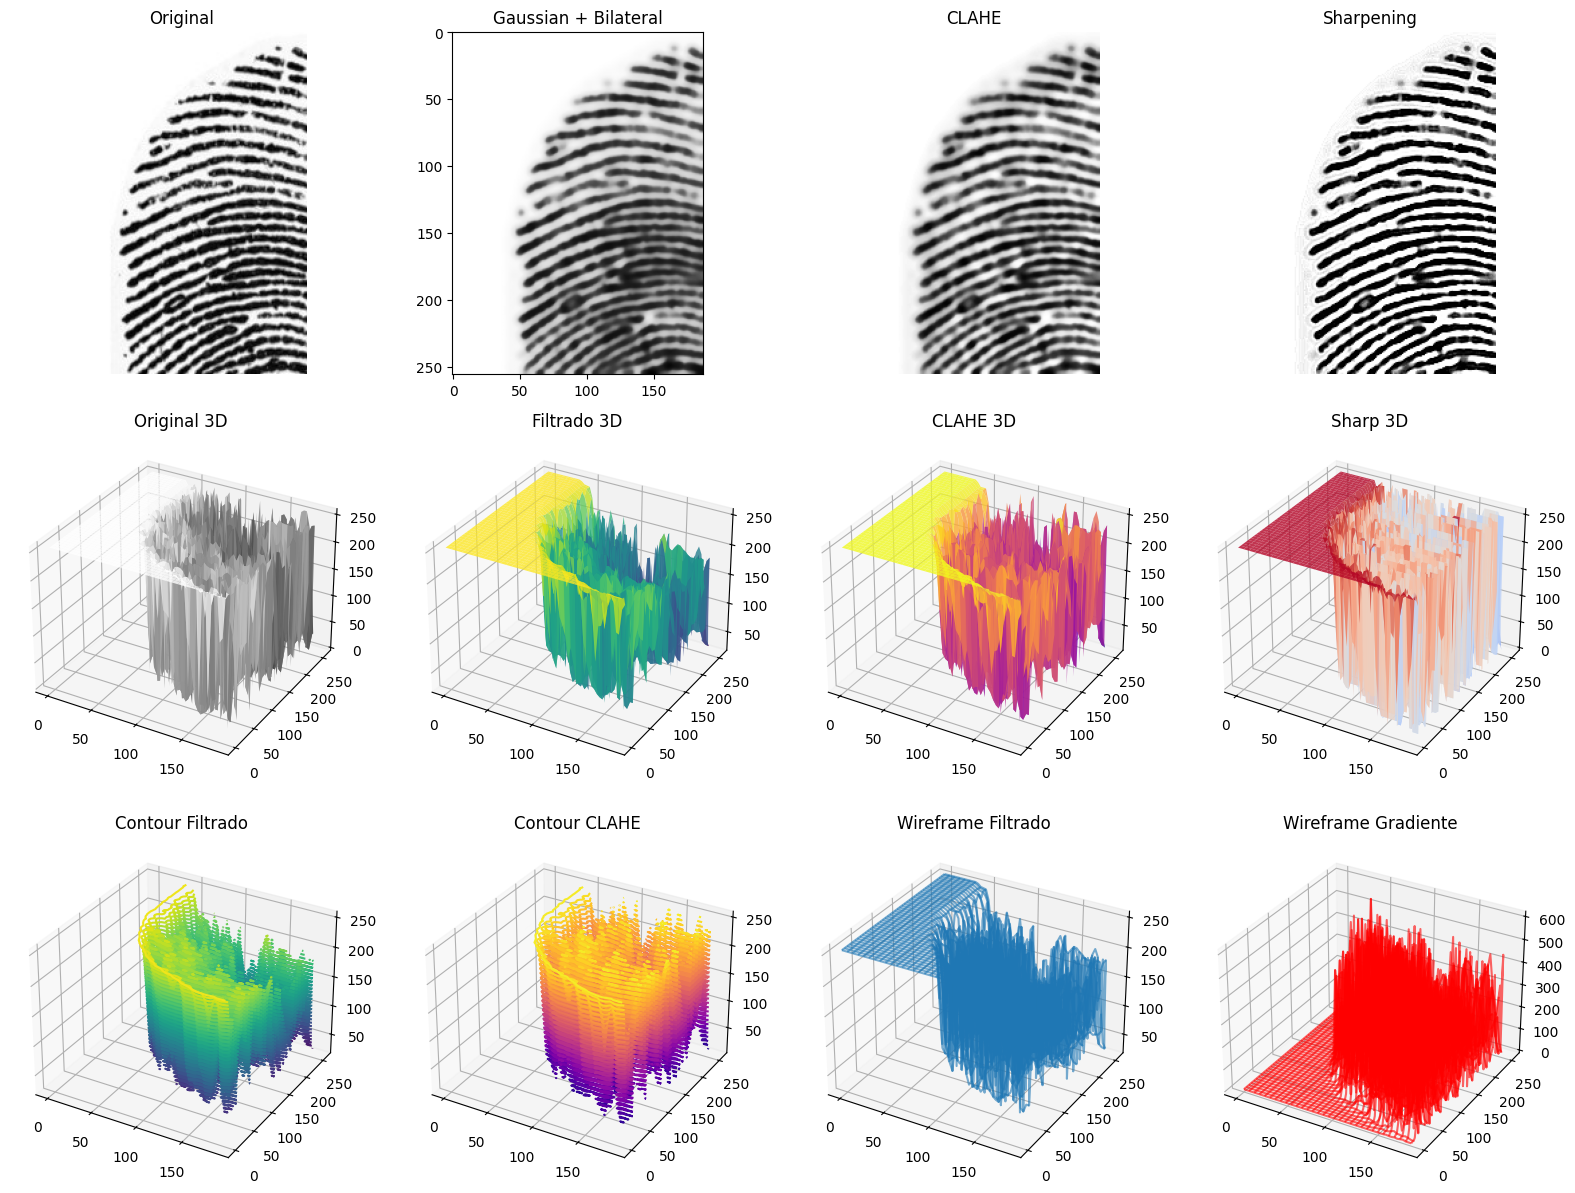

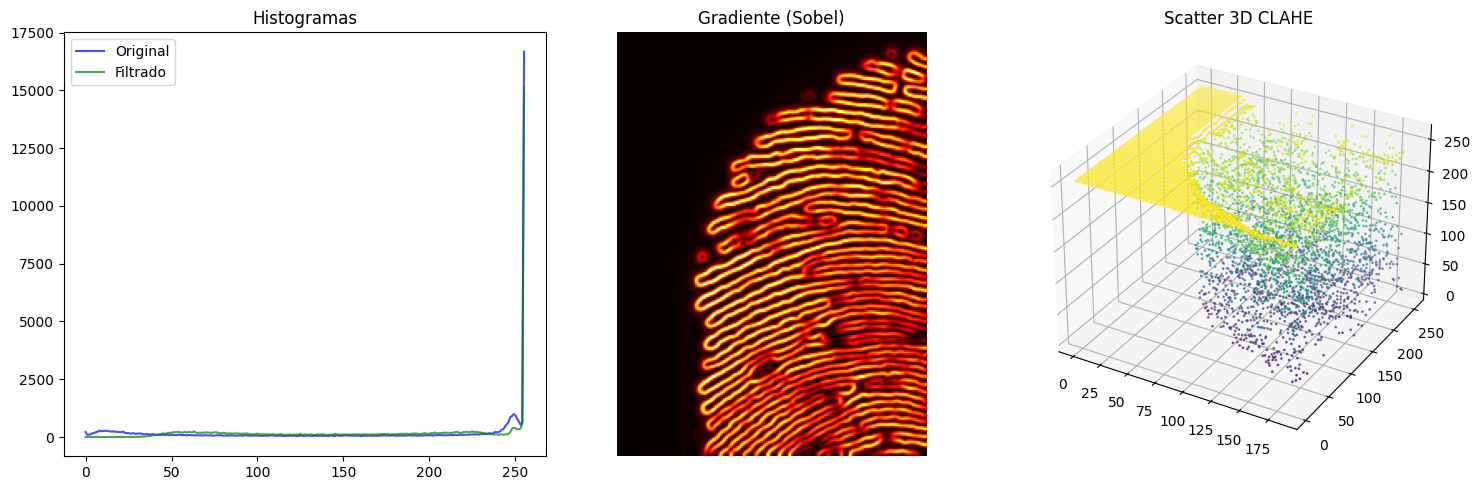

In [13]:
parte_seleccionada = huellas_partes[0]

filtrado = cv2.GaussianBlur(parte_seleccionada, (5, 5), 1)
filtrado = cv2.bilateralFilter(filtrado, 9, 75, 75)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
filtrado_clahe = clahe.apply(filtrado)

kernel_sharpen = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
filtrado_sharp = cv2.filter2D(filtrado_clahe, -1, kernel_sharpen)

sobelx = cv2.Sobel(filtrado, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(filtrado, cv2.CV_64F, 0, 1, ksize=3)
gradiente = np.sqrt(sobelx**2 + sobely**2)

alto_parte, ancho_parte = filtrado.shape
x = np.arange(0, ancho_parte)
y = np.arange(0, alto_parte)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(3, 4, 1)
ax1.imshow(parte_seleccionada, cmap='gray')
ax1.set_title('Original')
ax1.axis('off')

ax2 = fig.add_subplot(3, 4, 2)
ax2.imshow(filtrado, cmap='gray')
ax2.set_title('Gaussian + Bilateral')
ax1.axis('off')

ax3 = fig.add_subplot(3, 4, 3)
ax3.imshow(filtrado_clahe, cmap='gray')
ax3.set_title('CLAHE')
ax3.axis('off')

ax4 = fig.add_subplot(3, 4, 4)
ax4.imshow(filtrado_sharp, cmap='gray')
ax4.set_title('Sharpening')
ax4.axis('off')

ax5 = fig.add_subplot(3, 4, 5, projection='3d')
step = 3
X_sub = X[::step, ::step]
Y_sub = Y[::step, ::step]
Z_original = parte_seleccionada[::step, ::step]
ax5.plot_surface(X_sub, Y_sub, Z_original, cmap='gray', alpha=0.8)
ax5.set_title('Original 3D')

ax6 = fig.add_subplot(3, 4, 6, projection='3d')
Z_filtrado = filtrado[::step, ::step]
ax6.plot_surface(X_sub, Y_sub, Z_filtrado, cmap='viridis', alpha=0.8)
ax6.set_title('Filtrado 3D')

ax7 = fig.add_subplot(3, 4, 7, projection='3d')
Z_clahe = filtrado_clahe[::step, ::step]
ax7.plot_surface(X_sub, Y_sub, Z_clahe, cmap='plasma', alpha=0.8)
ax7.set_title('CLAHE 3D')

ax8 = fig.add_subplot(3, 4, 8, projection='3d')
Z_sharp = filtrado_sharp[::step, ::step]
ax8.plot_surface(X_sub, Y_sub, Z_sharp, cmap='coolwarm', alpha=0.8)
ax8.set_title('Sharp 3D')

ax9 = fig.add_subplot(3, 4, 9, projection='3d')
ax9.contour3D(X_sub, Y_sub, Z_filtrado, 40, cmap='viridis')
ax9.set_title('Contour Filtrado')

ax10 = fig.add_subplot(3, 4, 10, projection='3d')
ax10.contour3D(X_sub, Y_sub, Z_clahe, 40, cmap='plasma')
ax10.set_title('Contour CLAHE')

ax11 = fig.add_subplot(3, 4, 11, projection='3d')
ax11.plot_wireframe(X_sub, Y_sub, Z_filtrado, alpha=0.6)
ax11.set_title('Wireframe Filtrado')

ax12 = fig.add_subplot(3, 4, 12, projection='3d')
Z_grad = gradiente[::step, ::step]
ax12.plot_wireframe(X_sub, Y_sub, Z_grad, alpha=0.6, color='red')
ax12.set_title('Wireframe Gradiente')

plt.tight_layout()
plt.show()

fig2 = plt.figure(figsize=(15, 5))

ax1 = fig2.add_subplot(1, 3, 1)
hist_orig = cv2.calcHist([parte_seleccionada], [0], None, [256], [0, 256])
ax1.plot(hist_orig, color='blue', alpha=0.7, label='Original')
hist_filt = cv2.calcHist([filtrado], [0], None, [256], [0, 256])
ax1.plot(hist_filt, color='green', alpha=0.7, label='Filtrado')
ax1.set_title('Histogramas')
ax1.legend()

ax2 = fig2.add_subplot(1, 3, 2)
ax2.imshow(gradiente, cmap='hot')
ax2.set_title('Gradiente (Sobel)')
ax2.axis('off')

ax3 = fig2.add_subplot(1, 3, 3, projection='3d')
scatter = ax3.scatter(X_sub, Y_sub, Z_clahe, c=Z_clahe, cmap='viridis', s=1)
ax3.set_title('Scatter 3D CLAHE')

plt.tight_layout()
plt.show()





